In [66]:
import pandas as pd
import bert_score
import os
import logging
import transformers
import itertools


transformers.tokenization_utils.logger.setLevel(logging.ERROR)
transformers.configuration_utils.logger.setLevel(logging.ERROR)
transformers.modeling_utils.logger.setLevel(logging.ERROR)
bert_score.__version__

'0.3.12'

In [97]:
df_data=pd.read_csv("C:/Users/Arunima/Desktop/685/project/Bert-score/Enc-dec/EncDec_Dae_Inference.csv")

In [98]:
df_data

,source_sentence,pred,gold
0,There are many significant elevations in the G...,there are many mountains in the canton of bern...,There are many important peaks in the Grison A...
1,Horst K ppel LRB born on May in Stuttgart Germ...,he is a former german football player. he has ...,Horst K ppel LRB born May RRB is a former Germ...
2,PERSON Roy PERSON LRB born NUMBER March NUMBER...,person lrb born number march number rrb is a d...,PERSON LRB born NUMBER March NUMBER RRB is a D...
3,There are many different types of LC phases wh...,many different types of optical fibers are pos...,Different phases are different because their o...
4,Producer and screenwriter PERSON is the novel ...,person s son is person. he is the author of th...,Producer and screenwriter PERSON is the novel ...
...,...,...,...
6995,Skardu District is part of Baltistan and curre...,it is part of the baluga region of the gilgit ...,Skardu District is part of Baltistan and curre...
6996,With his position in the Tanzanian government ...,he was also a member of the national park and ...,With his position in the Tanzanian government ...
6997,The Governor of LOCATION is the chief executiv...,the governor general is the head of state who ...,The Governor is in charge of making yearly Sta...
6998,Port is a commune in the Ain department in eas...,porth is a commune. it is found in the region ...,Port is a commune. It is found in the region R...


In [84]:
df_data['pred'] = [str(x) for x in df_data['pred']]
df_data['source_sentence'] = [str(x) for x in df_data['source_sentence']]
# temp_source_sentences= list(df_data['source_sentence'])
# temp_source_sentences = [x.split() for x in temp_source_sentences]
# temp_source_sentences = [(" ").join(x[1:]) for x in temp_source_sentences]
# df_data['source_sentence'] = temp_source_sentences

In [48]:
df_data

,source_sentence,pred,gold
0,There are many significant elevations in the G...,the swiss alps are located in the canton of ti...,There are many important peaks in the Grison A...
1,Horst K ppel LRB born on May in Stuttgart Germ...,he is a former german football player. he has ...,Horst K ppel LRB born May RRB is a former Germ...
2,PERSON Roy PERSON LRB born NUMBER March NUMBER...,person lrb born number may number rrb is a dut...,PERSON LRB born NUMBER March NUMBER RRB is a D...
3,There are many different types of LC phases wh...,many different types of organisms can be made ...,Different phases are different because their o...
4,Producer and screenwriter PERSON is the novel ...,person s book is the first book written by per...,Producer and screenwriter PERSON is the novel ...
...,...,...,...
6995,Skardu District is part of Baltistan and curre...,it is part of the baluchistan province of the ...,Skardu District is part of Baltistan and curre...
6996,With his position in the Tanzanian government ...,he was also an important person in the governm...,With his position in the Tanzanian government ...
6997,The Governor of LOCATION is the chief executiv...,the governor general is the head of state in t...,The Governor is in charge of making yearly Sta...
6998,Port is a commune in the Ain department in eas...,it is found in the region ain in the aisne dep...,Port is a commune. It is found in the region R...


In [99]:
sentence_id=[]
for index,row in df_data.iterrows():
    sentence_id.append(index)
df_data['sentence_id']=sentence_id
df_data

,source_sentence,pred,gold,sentence_id
0,There are many significant elevations in the G...,there are many mountains in the canton of bern...,There are many important peaks in the Grison A...,0
1,Horst K ppel LRB born on May in Stuttgart Germ...,he is a former german football player. he has ...,Horst K ppel LRB born May RRB is a former Germ...,1
2,PERSON Roy PERSON LRB born NUMBER March NUMBER...,person lrb born number march number rrb is a d...,PERSON LRB born NUMBER March NUMBER RRB is a D...,2
3,There are many different types of LC phases wh...,many different types of optical fibers are pos...,Different phases are different because their o...,3
4,Producer and screenwriter PERSON is the novel ...,person s son is person. he is the author of th...,Producer and screenwriter PERSON is the novel ...,4
...,...,...,...,...
6995,Skardu District is part of Baltistan and curre...,it is part of the baluga region of the gilgit ...,Skardu District is part of Baltistan and curre...,6995
6996,With his position in the Tanzanian government ...,he was also a member of the national park and ...,With his position in the Tanzanian government ...,6996
6997,The Governor of LOCATION is the chief executiv...,the governor general is the head of state who ...,The Governor is in charge of making yearly Sta...,6997
6998,Port is a commune in the Ain department in eas...,porth is a commune. it is found in the region ...,Port is a commune. It is found in the region R...,6998


In [100]:
#run
df_data_sample = df_data
from bert_score import score
P_sample, R_sample, F1_sample = score(list((df_data_sample['source_sentence'])), list((df_data_sample['pred'])), lang='en', verbose=True, idf = True)

preparing IDF dict...
done in 15.49 seconds
calculating scores...
computing bert embedding.



computing greedy matching.



done in 1579.64 seconds, 4.43 sentences/sec


In [12]:
#run
with open("C:/Users/Arunima/Desktop/685/project/Bert-score/precision_from_Bert_score_t5_merged_output.txt", "w", encoding = 'utf-8') as output:
    output.write(str(P_sample))

In [13]:
#run
with open("C:/Users/Arunima/Desktop/685/project/Bert-score/recall_from_Bert_score_t5_merged_output.txt", "w", encoding = 'utf-8') as output:
    output.write(str(R_sample))

In [14]:
#run
with open("C:/Users/Arunima/Desktop/685/project/Bert-score/f1_from_Bert_score_t5_merged_output.txt", "w", encoding = 'utf-8') as output:
    output.write(str(F1_sample))

In [101]:
p_list = P_sample.tolist()

In [102]:
df_data['score_pred']=p_list

In [103]:
df_data

,source_sentence,pred,gold,sentence_id,score_pred
0,There are many significant elevations in the G...,there are many mountains in the canton of bern...,There are many important peaks in the Grison A...,0,0.839855
1,Horst K ppel LRB born on May in Stuttgart Germ...,he is a former german football player. he has ...,Horst K ppel LRB born May RRB is a former Germ...,1,0.804732
2,PERSON Roy PERSON LRB born NUMBER March NUMBER...,person lrb born number march number rrb is a d...,PERSON LRB born NUMBER March NUMBER RRB is a D...,2,0.833908
3,There are many different types of LC phases wh...,many different types of optical fibers are pos...,Different phases are different because their o...,3,0.859236
4,Producer and screenwriter PERSON is the novel ...,person s son is person. he is the author of th...,Producer and screenwriter PERSON is the novel ...,4,0.837461
...,...,...,...,...,...
6995,Skardu District is part of Baltistan and curre...,it is part of the baluga region of the gilgit ...,Skardu District is part of Baltistan and curre...,6995,0.798166
6996,With his position in the Tanzanian government ...,he was also a member of the national park and ...,With his position in the Tanzanian government ...,6996,0.838705
6997,The Governor of LOCATION is the chief executiv...,the governor general is the head of state who ...,The Governor is in charge of making yearly Sta...,6997,0.815958
6998,Port is a commune in the Ain department in eas...,porth is a commune. it is found in the region ...,Port is a commune. It is found in the region R...,6998,0.916679


0.9209052437118121


(array([  1.,   0.,   0.,   0.,   1.,   1.,   2.,   3.,   5.,   7.,   9.,
         16.,  20.,  14.,  29.,  28.,  37.,  43.,  33.,  59.,  57.,  80.,
         81.,  92., 123., 130., 143., 150., 143., 161., 175., 205., 207.,
        237., 231., 246., 301., 393., 451., 573., 688., 706., 595., 366.,
        131.,  27.]),
 array([0.68263406, 0.68932963, 0.69602521, 0.70272079, 0.70941637,
        0.71611195, 0.72280753, 0.72950311, 0.73619869, 0.74289427,
        0.74958984, 0.75628542, 0.762981  , 0.76967658, 0.77637216,
        0.78306774, 0.78976332, 0.7964589 , 0.80315448, 0.80985006,
        0.81654563, 0.82324121, 0.82993679, 0.83663237, 0.84332795,
        0.85002353, 0.85671911, 0.86341469, 0.87011027, 0.87680584,
        0.88350142, 0.890197  , 0.89689258, 0.90358816, 0.91028374,
        0.91697932, 0.9236749 , 0.93037048, 0.93706605, 0.94376163,
        0.95045721, 0.95715279, 0.96384837, 0.97054395, 0.97723953,
        0.98393511, 0.99063069]),
 <BarContainer object of 46 artists>

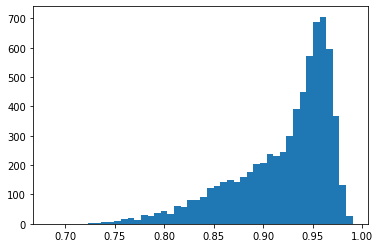

In [70]:
import numpy as np
p_np = np.array(p_list)
print(p_np.mean())
import matplotlib.pyplot as plt
np.histogram(p_np)
plt.hist(p_np, bins='auto')

In [104]:
df_data['precision_pred_with_brevity_penalty']=[df_data['score_pred'].iloc[i]*min(1,(len(df_data['pred'].iloc[i])/len(df_data['source_sentence'].iloc[i]))) for i in range(len(df_data))]

In [105]:
df_data

,source_sentence,pred,gold,sentence_id,score_pred,precision_pred_with_brevity_penalty
0,There are many significant elevations in the G...,there are many mountains in the canton of bern...,There are many important peaks in the Grison A...,0,0.839855,0.759521
1,Horst K ppel LRB born on May in Stuttgart Germ...,he is a former german football player. he has ...,Horst K ppel LRB born May RRB is a former Germ...,1,0.804732,0.464476
2,PERSON Roy PERSON LRB born NUMBER March NUMBER...,person lrb born number march number rrb is a d...,PERSON LRB born NUMBER March NUMBER RRB is a D...,2,0.833908,0.611532
3,There are many different types of LC phases wh...,many different types of optical fibers are pos...,Different phases are different because their o...,3,0.859236,0.859236
4,Producer and screenwriter PERSON is the novel ...,person s son is person. he is the author of th...,Producer and screenwriter PERSON is the novel ...,4,0.837461,0.502477
...,...,...,...,...,...,...
6995,Skardu District is part of Baltistan and curre...,it is part of the baluga region of the gilgit ...,Skardu District is part of Baltistan and curre...,6995,0.798166,0.380079
6996,With his position in the Tanzanian government ...,he was also a member of the national park and ...,With his position in the Tanzanian government ...,6996,0.838705,0.403528
6997,The Governor of LOCATION is the chief executiv...,the governor general is the head of state who ...,The Governor is in charge of making yearly Sta...,6997,0.815958,0.332305
6998,Port is a commune in the Ain department in eas...,porth is a commune. it is found in the region ...,Port is a commune. It is found in the region R...,6998,0.916679,0.916679


In [91]:
df_data

,source_sentence,gold,pred,sentence_id,score_pred,precision_pred_with_brevity_penalty
0,There are many significant elevations in the G...,There are many important peaks in the Grison A...,There are many significant elevations in the G...,0,0.969427,0.961212
1,"Horst KÃ ppel -LRB- born on May 17 , 1948 in S...",Horst KÃ ppel -LRB- born 17 May 1948 -RRB- is ...,Horst Kppel LRB born May 17 RRB is a former Ge...,1,0.813106,0.316733
2,PERSON@1 '' Roy '' PERSON@2 -LRB- born NUMBER@...,"PERSON@3 -LRB- born NUMBER@1 March , NUMBER@2 ...",PERSON@1 '' Roy '' PERSON@2 - born NUMBER@1 Ma...,2,0.909565,0.557929
3,"There are many different types of LC phases , ...",Different phases are different because their o...,"There are many different types of LC phases , ...",3,1.000000,1.000000
4,Producer and screenwriter PERSON@1 is the nove...,Producer and screenwriter PERSON@1 is the nove...,PERSON@1 is the son of PERSON@1 .,4,0.823277,0.232206
...,...,...,...,...,...,...
6995,Skardu District is part of Baltistan and curre...,Skardu District is part of Baltistan and curre...,Skardu District is part of Baltistan and curre...,6995,0.923271,0.661766
6996,With his position in the Tanzanian government ...,With his position in the Tanzanian government ...,With his position in the Tanzanian government ...,6996,0.990707,0.981821
6997,The Governor of LOCATION@1 is the chief execut...,The Governor is in charge of making yearly '' ...,The Governor of LOCATION@1 is the chief execut...,6997,0.993771,0.986382
6998,Port is a commune in the Ain department in eas...,Port is a commune . It is found in the region ...,It is found in the region Nord Pas de Calais i...,6998,0.902936,0.902936


In [24]:
p_list=df_data['precision_pred_with_brevity_penalty']
import numpy as np
p_np = np.array(p_list)
print(p_np.mean())
import matplotlib.pyplot as plt
np.histogram(p_np)
plt.hist(p_np, bins='auto')

KeyError: 'precision_pred_with_brevity_penalty'

In [30]:
df_data.to_csv("C:/Users/Arunima/Desktop/685/project/Bert-score/Bert_score_t5_merged_output.csv",index=False)

In [7]:
df_data=pd.read_csv("C:/Users/Arunima/Desktop/685/project/Bert-score/Bert_score_t5_merged_output.csv")

In [106]:
df_data=df_data.drop(columns=['score_pred'])

In [107]:
df_data

,source_sentence,pred,gold,sentence_id,precision_pred_with_brevity_penalty
0,There are many significant elevations in the G...,there are many mountains in the canton of bern...,There are many important peaks in the Grison A...,0,0.759521
1,Horst K ppel LRB born on May in Stuttgart Germ...,he is a former german football player. he has ...,Horst K ppel LRB born May RRB is a former Germ...,1,0.464476
2,PERSON Roy PERSON LRB born NUMBER March NUMBER...,person lrb born number march number rrb is a d...,PERSON LRB born NUMBER March NUMBER RRB is a D...,2,0.611532
3,There are many different types of LC phases wh...,many different types of optical fibers are pos...,Different phases are different because their o...,3,0.859236
4,Producer and screenwriter PERSON is the novel ...,person s son is person. he is the author of th...,Producer and screenwriter PERSON is the novel ...,4,0.502477
...,...,...,...,...,...
6995,Skardu District is part of Baltistan and curre...,it is part of the baluga region of the gilgit ...,Skardu District is part of Baltistan and curre...,6995,0.380079
6996,With his position in the Tanzanian government ...,he was also a member of the national park and ...,With his position in the Tanzanian government ...,6996,0.403528
6997,The Governor of LOCATION is the chief executiv...,the governor general is the head of state who ...,The Governor is in charge of making yearly Sta...,6997,0.332305
6998,Port is a commune in the Ain department in eas...,porth is a commune. it is found in the region ...,Port is a commune. It is found in the region R...,6998,0.916679


In [108]:
df_data=df_data.rename(columns={"precision_pred_with_brevity_penalty": "bert_score_precision_pred_with_brevity_penalty"})

In [109]:
df_data

,source_sentence,pred,gold,sentence_id,bert_score_precision_pred_with_brevity_penalty
0,There are many significant elevations in the G...,there are many mountains in the canton of bern...,There are many important peaks in the Grison A...,0,0.759521
1,Horst K ppel LRB born on May in Stuttgart Germ...,he is a former german football player. he has ...,Horst K ppel LRB born May RRB is a former Germ...,1,0.464476
2,PERSON Roy PERSON LRB born NUMBER March NUMBER...,person lrb born number march number rrb is a d...,PERSON LRB born NUMBER March NUMBER RRB is a D...,2,0.611532
3,There are many different types of LC phases wh...,many different types of optical fibers are pos...,Different phases are different because their o...,3,0.859236
4,Producer and screenwriter PERSON is the novel ...,person s son is person. he is the author of th...,Producer and screenwriter PERSON is the novel ...,4,0.502477
...,...,...,...,...,...
6995,Skardu District is part of Baltistan and curre...,it is part of the baluga region of the gilgit ...,Skardu District is part of Baltistan and curre...,6995,0.380079
6996,With his position in the Tanzanian government ...,he was also a member of the national park and ...,With his position in the Tanzanian government ...,6996,0.403528
6997,The Governor of LOCATION is the chief executiv...,the governor general is the head of state who ...,The Governor is in charge of making yearly Sta...,6997,0.332305
6998,Port is a commune in the Ain department in eas...,porth is a commune. it is found in the region ...,Port is a commune. It is found in the region R...,6998,0.916679


In [19]:
df_data=df_data.drop(columns=['bert_score_pred'])

In [20]:
df_data

,source_sentence,gold,pred,bert_score_precision_pred_with_brevity_penalty,sentence_id
0,There are many significant elevations in the G...,There are many important peaks in the Grison A...,"There are many elevations in the Grison Alps, ...",0.851226,0
1,"Horst KÃ ppel -LRB- born on May 17 , 1948 in S...",Horst KÃ ppel -LRB- born 17 May 1948 -RRB- is ...,Horst K ppel -LRB- born 17 May 1948 -RRB- is a...,0.374086,1
2,PERSON@1 '' Roy '' PERSON@2 -LRB- born NUMBER@...,"PERSON@3 -LRB- born NUMBER@1 March , NUMBER@2 ...",PERSON@1 -LRB- born NUMBER@1 March NUMBER@2 -R...,0.619800,2
3,"There are many different types of LC phases , ...",Different phases are different because their o...,"There are many different types of LC phases, w...",0.965421,3
4,Producer and screenwriter PERSON@1 is the nove...,Producer and screenwriter PERSON@1 is the nove...,Producer and screenwriter PERSON@1 is the nove...,0.913501,4
...,...,...,...,...,...
6995,Skardu District is part of Baltistan and curre...,Skardu District is part of Baltistan and curre...,Skardu District is one of the seven districts ...,0.684714,6995
6996,With his position in the Tanzanian government ...,With his position in the Tanzanian government ...,With his job in the Tanzanian government as he...,0.923308,6996
6997,The Governor of LOCATION@1 is the chief execut...,The Governor is in charge of making yearly '' ...,The Governor of LOCATION@1 is the chief execut...,0.951432,6997
6998,Port is a commune in the Ain department in eas...,Port is a commune . It is found in the region ...,It is found in the region Rhône-Alpes in the A...,0.885733,6998


BERT_SCORE_SOURCE_GOLD


In [79]:
#run
df_data_sample = df_data
from bert_score import score
P_sample, R_sample, F1_sample = score(list((df_data_sample['source_sentence'])), list((df_data_sample['gold'])), lang='en', verbose=True, idf = True)

preparing IDF dict...
done in 12.60 seconds
calculating scores...
computing bert embedding.



computing greedy matching.



done in 1824.74 seconds, 3.84 sentences/sec


In [80]:
p_list = P_sample.tolist()

In [81]:
df_data['bert_score_gold']=p_list

In [82]:
df_data['bert_precision_gold_with_brevity_penalty']=[df_data['bert_score_gold'].iloc[i]*min(1,(len(df_data['pred'].iloc[i])/len(df_data['source_sentence'].iloc[i]))) for i in range(len(df_data))]

In [84]:
df_data

,source_sentence,pred,gold,sentence_id,bert_score_precision_pred_with_brevity_penalty,bert_score_gold,bert_precision_gold_with_brevity_penalty
0,There are many significant elevations in the G...,'Piz Bernina,There are many important peaks in the Grison A...,0,0.080085,0.969608,0.098604
1,"Horst KÃ ppel -LRB- born on May 17 , 1948 in S...",'Horst K ppel -LRB- born 17 May 1948 -RRB- is ...,Horst KÃ ppel -LRB- born 17 May 1948 -RRB- is ...,1,0.376592,0.867953,0.393606
2,PERSON@1 '' Roy '' PERSON@2 -LRB- born NUMBER@...,'PERSON@3 -LRB- born NUMBER@1 March NUMBER@2 -...,"PERSON@3 -LRB- born NUMBER@1 March , NUMBER@2 ...",2,0.340596,0.855754,0.344066
3,"There are many different types of LC phases , ...","'There are many different types of LC phases, ...",Different phases are different because their o...,3,0.858422,0.843999,0.768848
4,Producer and screenwriter PERSON@1 is the nove...,"""Producer and screenwriter PERSON@1 is the nov...",Producer and screenwriter PERSON@1 is the nove...,4,0.921880,0.995870,0.970335
...,...,...,...,...,...,...,...
6995,Skardu District is part of Baltistan and curre...,'Skardu District is part of Baltistan and cons...,Skardu District is part of Baltistan and curre...,6995,0.912536,0.994502,0.937017
6996,With his position in the Tanzanian government ...,"""With his position in the Tanzanian government...",With his position in the Tanzanian government ...,6996,0.957195,0.987658,0.974371
6997,The Governor of LOCATION@1 is the chief execut...,"""The Governor of LOCATION@1 is the chief execu...",The Governor is in charge of making yearly '' ...,6997,0.815978,0.917485,0.794698
6998,Port is a commune in the Ain department in eas...,'Port is a commune.,Port is a commune . It is found in the region ...,6998,0.266619,0.971808,0.312955


In [85]:
df_data=df_data.drop(columns=['bert_score_gold','bert_precision_gold_with_brevity_penalty'])

In [86]:
df_data

,source_sentence,pred,gold,sentence_id,bert_score_precision_pred_with_brevity_penalty
0,There are many significant elevations in the G...,'Piz Bernina,There are many important peaks in the Grison A...,0,0.080085
1,"Horst KÃ ppel -LRB- born on May 17 , 1948 in S...",'Horst K ppel -LRB- born 17 May 1948 -RRB- is ...,Horst KÃ ppel -LRB- born 17 May 1948 -RRB- is ...,1,0.376592
2,PERSON@1 '' Roy '' PERSON@2 -LRB- born NUMBER@...,'PERSON@3 -LRB- born NUMBER@1 March NUMBER@2 -...,"PERSON@3 -LRB- born NUMBER@1 March , NUMBER@2 ...",2,0.340596
3,"There are many different types of LC phases , ...","'There are many different types of LC phases, ...",Different phases are different because their o...,3,0.858422
4,Producer and screenwriter PERSON@1 is the nove...,"""Producer and screenwriter PERSON@1 is the nov...",Producer and screenwriter PERSON@1 is the nove...,4,0.921880
...,...,...,...,...,...
6995,Skardu District is part of Baltistan and curre...,'Skardu District is part of Baltistan and cons...,Skardu District is part of Baltistan and curre...,6995,0.912536
6996,With his position in the Tanzanian government ...,"""With his position in the Tanzanian government...",With his position in the Tanzanian government ...,6996,0.957195
6997,The Governor of LOCATION@1 is the chief execut...,"""The Governor of LOCATION@1 is the chief execu...",The Governor is in charge of making yearly '' ...,6997,0.815978
6998,Port is a commune in the Ain department in eas...,'Port is a commune.,Port is a commune . It is found in the region ...,6998,0.266619


In [31]:
df_data.to_csv("C:/Users/Arunima/Desktop/685/project/Bert-score/datasets/Bert_dataset_bert_score.csv",index=False)

In [29]:
df_data=df_data.drop(columns=['bert_score_precision_pred_with_brevity_penalty','bert_precision_gold_with_brevity_penalty'])

In [64]:
df_data

,source_sentence,gold,pred,sentence_id,bert_score_precision_pred_with_brevity_penalty
0,There are many significant elevations in the G...,There are many important peaks in the Grison A...,There are many significant elevations in the G...,0,0.961204
1,"Horst KÃ ppel -LRB- born on May 17 , 1948 in S...",Horst KÃ ppel -LRB- born 17 May 1948 -RRB- is ...,"Horst Kppel -LRB- born on May 17 , 1948 in Stu...",1,0.606081
2,PERSON@1 '' Roy '' PERSON@2 -LRB- born NUMBER@...,"PERSON@3 -LRB- born NUMBER@1 March , NUMBER@2 ...",PERSON@1 '' Roy '' PERSON@2 - born NUMBER@1 Ma...,2,0.557603
3,"There are many different types of LC phases , ...",Different phases are different because their o...,"There are many different types of LC phases , ...",3,1.000000
4,Producer and screenwriter PERSON@1 is the nove...,Producer and screenwriter PERSON@1 is the nove...,PERSON@1 is the son of PERSON@1 .,4,0.232227
...,...,...,...,...,...
6995,Skardu District is part of Baltistan and curre...,Skardu District is part of Baltistan and curre...,Skardu District is part of Baltistan and curre...,6995,0.662591
6996,With his position in the Tanzanian government ...,With his position in the Tanzanian government ...,With his position in the Tanzanian government ...,6996,1.000000
6997,The Governor of LOCATION@1 is the chief execut...,The Governor is in charge of making yearly '' ...,The Governor of LOCATION@1 is the chief execut...,6997,0.986465
6998,Port is a commune in the Ain department in eas...,Port is a commune . It is found in the region ...,It is found in the region Nord Pas de Calais i...,6998,0.903975


In [110]:
df_data.to_csv("C:/Users/Arunima/Desktop/685/project/Bert-score/pegasus/enc-dec_dae_dataset_bert_score.csv",index=False)